In [1]:
import sys
sys.path.append('../../src')
from modules import *
from columns import *
sys.path.append('../../src/python')
from random_funks import *

# Učitavanje podataka za BCF

In [2]:
# BCF_CAESAR # log(L/kg)
report_BCF_CAESAR = pd.read_csv('../../data/VEGA_QSAR_modeli/report_BCF_CAESAR.txt',index_col=0, sep='\t')
report_BCF_CAESAR = zamijeni_nazive_molekula(report_BCF_CAESAR)
BCF_CAESAR = report_BCF_CAESAR['Assessment'].values

In [3]:
# BCF_KNN # log(L/kg)
report_BCF_KNN = pd.read_csv('../../data/VEGA_QSAR_modeli/report_BCF_KNN.txt',index_col=0, sep='\t')
report_BCF_KNN = zamijeni_nazive_molekula(report_BCF_KNN)
BCF_KNN = report_BCF_KNN['Assessment'].values

In [4]:
# BCF_MEYLAN # log(L/kg)
report_BCF_MEYLAN = pd.read_csv('../../data/VEGA_QSAR_modeli/report_BCF_MEYLAN.txt',index_col=0, sep='\t')
report_BCF_MEYLAN = zamijeni_nazive_molekula(report_BCF_MEYLAN)
BCF_MEYLAN = report_BCF_MEYLAN['Assessment'].values

In [5]:
# BCF_ARNOTGOBAS # log(L/kg)
report_BCF_ARNOTGOBAS = pd.read_csv('../../data/VEGA_QSAR_modeli/report_BCF_ARNOTGOBAS.txt',index_col=0, sep='\t')
report_BCF_ARNOTGOBAS = zamijeni_nazive_molekula(report_BCF_ARNOTGOBAS)
BCF_ARNOTGOBAS = report_BCF_ARNOTGOBAS['Assessment'].values

In [6]:
BCF = pd.DataFrame({'Id': report_BCF_CAESAR['Id'], 
                     'BCF_CAESAR': BCF_CAESAR, 
                     'BCF_KNN': BCF_KNN, 
                     'BCF_MEYLAN': BCF_MEYLAN,
                     'BCF_ARNOTGOBAS': BCF_ARNOTGOBAS})
BCF.set_index('Id', inplace=True)
BCF_modified = extract_numeric_from_df(BCF)  

# Rangirala svaki BCF posebno i average rank ili

In [7]:
# Rangiranje vrijednosti za svaki model
BCF_modified['BCF_CAESAR_rank'] = BCF_modified['BCF_CAESAR'].rank(ascending=False) # PRVI RANK DOBIJE NAJVEĆI log(l/kg)
BCF_modified['BCF_KNN_rank'] = BCF_modified['BCF_KNN'].rank(ascending=False)
BCF_modified['BCF_MEYLAN_rank'] = BCF_modified['BCF_MEYLAN'].rank(ascending=False)
BCF_modified['BCF_ARNOTGOBAS_rank'] = BCF_modified['BCF_ARNOTGOBAS'].rank(ascending=False)

# Izračunavanje prosječnog ranga
average_rank = (BCF_modified['BCF_CAESAR_rank'] + 
                BCF_modified['BCF_KNN_rank'] + 
                BCF_modified['BCF_MEYLAN_rank'] +
                BCF_modified['BCF_ARNOTGOBAS_rank']) / 4

BCF_modified['BCF_average_rank_1'] = average_rank

# ili prvo napravim average i onda rank

In [8]:
# Izračunavanje prosječnog log(L/kg)
average_rank = (BCF_modified['BCF_CAESAR'] + 
                BCF_modified['BCF_KNN'] + 
                BCF_modified['BCF_MEYLAN'] +
                BCF_modified['BCF_ARNOTGOBAS']) / 4

BCF_modified['BCF_average_rank_2'] = average_rank.rank(ascending=False)

# Učitavanje podataka za PERZISTENTNOST

In [9]:
report=pd.read_csv('../../data/VEGA_report.csv',index_col=0)

In [10]:
# REDYBIO_IRFMN # 
report_READYBIO_IRFMN = pd.read_csv('../../data/VEGA_QSAR_modeli/report_READYBIO_IRFMN.txt',index_col=0, sep='\t')
report_READYBIO_IRFMN = zamijeni_nazive_molekula(report_READYBIO_IRFMN)
READYBIO_IRFMN = report_READYBIO_IRFMN['Assessment'].values

In [11]:
# Persistence (sediment) quantitative model (IRFMN) # days
report_PERS_SED_QUANT = pd.read_csv('../../data/VEGA_QSAR_modeli/report_PERS_SED_QUANT.txt',index_col=0, sep='\t')
report_PERS_SED_QUANT = zamijeni_nazive_molekula(report_PERS_SED_QUANT)
PERS_SED_QUANT = report_PERS_SED_QUANT['Assessment'].values

In [12]:
# Persistence (sediment) model (IRFMN) # 
report_PERS_SED = pd.read_csv('../../data/VEGA_QSAR_modeli/report_PERS_SED.txt',index_col=0, sep='\t')
report_PERS_SED = zamijeni_nazive_molekula(report_PERS_SED)
PERS_SED = report_PERS_SED['Assessment'].values

In [13]:
# Persistence (water) quantitative model (IRFMN) # days
report_PERS_WATER_QUANT = pd.read_csv('../../data/VEGA_QSAR_modeli/report_PERS_WATER_QUANT.txt',index_col=0, sep='\t')
report_PERS_WATER_QUANT = zamijeni_nazive_molekula(report_PERS_WATER_QUANT )
PERS_WATER_QUANT  = report_PERS_WATER_QUANT ['Assessment'].values

In [14]:
# Persistence (water) model (IRFMN) # 
report_PERS_WAT = pd.read_csv('../../data/VEGA_QSAR_modeli/report_PERS_WAT.txt',index_col=0, sep='\t')
report_PERS_WAT = zamijeni_nazive_molekula(report_PERS_WAT)
PERS_WAT = report_PERS_WAT['Assessment'].values

In [15]:
# Air Half-Life (IRFMN-CORAL) # h
report_PERS_AIR_CORAL = pd.read_csv('../../data/VEGA_QSAR_modeli/report_PERS_AIR_CORAL.txt',index_col=0, sep='\t')
report_PERS_AIR_CORAL = zamijeni_nazive_molekula(report_PERS_AIR_CORAL)
PERS_AIR_CORAL = report_PERS_AIR_CORAL['Assessment'].values

In [16]:
PERZ = pd.DataFrame({'Id': report_READYBIO_IRFMN['Id'],
                     'READYBIO_IRFMN': READYBIO_IRFMN, 
                     'PERS_SED_QUANT': PERS_SED_QUANT, 
                     'PERS_SED': PERS_SED,
                     'PERS_WATER_QUANT': PERS_WATER_QUANT,
                    'PERS_WAT': PERS_WAT,
                    'PERS_AIR_CORAL': PERS_AIR_CORAL})
PERZ.set_index('Id', inplace=True)
PERZ_modified = extract_numeric_from_df(PERZ)  # JE LI BOLJE MOŽDA OSTAVITI SVE PA DA RANGIRA I LOW, MODERATE I GOOD SLAGANJE?

# Rangirala svaki PERZ posebno i average rank

In [17]:
# Rangiranje vrijednosti za svaki model
PERZ_modified['READYBIO_IRFMN_rank'] = PERZ_modified['READYBIO_IRFMN'].rank(ascending=False) # PRVI RANK DOBIJE NAJVEĆI 
PERZ_modified['PERS_SED_QUANT_rank'] = PERZ_modified['PERS_SED_QUANT'].rank(ascending=False)
PERZ_modified['PERS_SED_rank'] = PERZ_modified['PERS_SED'].rank(ascending=False)
PERZ_modified['PERS_WATER_QUANT_rank'] = PERZ_modified['PERS_WATER_QUANT'].rank(ascending=False)
PERZ_modified['PERS_WAT_rank'] = PERZ_modified['PERS_WAT'].rank(ascending=False)
PERZ_modified['PERS_AIR_CORAL_rank'] = PERZ_modified['PERS_AIR_CORAL'].rank(ascending=False)


# Izračunavanje prosječnog ranga
average_rank = (PERZ_modified['READYBIO_IRFMN_rank'] + 
                PERZ_modified['PERS_SED_QUANT_rank'] + 
                PERZ_modified['PERS_SED_rank'] +
                PERZ_modified['PERS_WATER_QUANT_rank'] +
               PERZ_modified['PERS_WAT_rank'] +
               PERZ_modified['PERS_AIR_CORAL_rank']) / 6

PERZ_modified['PERZ_average_rank_1'] = average_rank

# Učitavanje podataka za TOKSIČNOST

## ukupni TU po lokacijama

In [18]:
toks=pd.read_csv('../../data/VEGA_QSAR_modeli/LC50_toks_average.csv',index_col=0)
toks = toks['TU_site_average_rank']

In [19]:
# ovo mi ne treba ukupni nego za svaku molekulu toksičnost! TU_sed od sva 3 modela

## TU_sed za 35 molekula na 28 lokacija

In [20]:
toks_rank=pd.read_csv('../../data/VEGA_QSAR_modeli/toks_rank.csv')

In [40]:
toks_rank['Id'] = PERZ.index
toks_rank.set_index('Id', inplace=True)
toks_rank

,TU_sed_DM_mean,TU_sed_FM_mean,TU_sed_FA_mean,average_rank
Id,,,,
Flu,1.000000,1.535714,1.571429,1.369048
Pir,2.535714,7.250000,1.607143,3.797619
BaA,8.000000,11.857143,5.535714,8.464286
Kri,6.035714,9.892857,3.714286,6.547619
BjF,8.321429,4.321429,8.250000,6.964286
BbF,2.571429,1.500000,3.785714,2.619048
BkF,9.464286,5.035714,10.285714,8.261905
BaP,6.035714,10.000000,6.607143,7.547619
DahA,11.285714,14.357143,13.214286,12.952381


In [22]:
# Izračunavanje prosječnog ranga
average_rank = (toks_rank['TU_sed_DM_mean'] + 
                toks_rank['TU_sed_FM_mean'] + 
                toks_rank['TU_sed_FA_mean']) / 3

toks_rank['average_rank']=average_rank

# PBT SCORE AVERAGE RANK

In [23]:
P = PERZ_modified['PERZ_average_rank_1']
B = BCF_modified['BCF_average_rank_1']
T = toks_rank['average_rank']

In [24]:
PBT_score = pd.DataFrame({'P': P, 
                          'B': B, 
                          'T': T})

In [25]:
score_PBT = (PBT_score['P'] + PBT_score['B'] + PBT_score['T']) / 3

PBT_score['score_PBT'] = score_PBT
PBT_score # kakvog smisla imaju ovi brojevi? nije mi ovo sjelo
           # što je manji PBT_score to je toksičnije/gore

,P,B,T,score_PBT
Id,,,,
Flu,23.833333,29.250,1.369048,18.150794
Pir,23.833333,30.000,3.797619,19.210317
BaA,23.833333,33.250,8.464286,21.849206
Kri,23.833333,33.250,6.547619,21.210317
BjF,18.500000,24.500,6.964286,16.654762
BbF,19.000000,25.000,2.619048,15.539683
BkF,23.833333,24.500,8.261905,18.865079
BaP,23.833333,26.500,7.547619,19.293651
DahA,22.916667,24.500,12.952381,20.123016


# KONCENTRACIJA * PBT_score

In [26]:
# relativni PBT_score po lokacijama

In [27]:
data = pd.read_csv('../../data/PAH_PCB_OCP.csv',index_col=0)

In [28]:
konc = data.iloc[:,5:40].T
nazivi_lokacija = [dodaj_nazive_lokacija_i_rijeka(data, i, i) for i in range(len(konc.columns))]
konc.columns = nazivi_lokacija

In [29]:
PBT_rel=konc.multiply(PBT_score['score_PBT'], axis='index')

array([[<Axes: title={'center': 'Kuželj-Gorski kotar - Kupa'}>,
        <Axes: title={'center': 'Iševnica- Gorski kotar - Kupica'}>,
        <Axes: title={'center': 'centar Karlovca - Kupa'}>,
        <Axes: title={'center': 'ušće u Kupu - Korana'}>,
        <Axes: title={'center': 'Zagrebačka županija - Kupčina'}>],
       [<Axes: title={'center': 'Stubičke Toplice - Vidak'}>,
        <Axes: title={'center': ' Istra - Mirna'}>,
        <Axes: title={'center': ' Istra - Mala Huba'}>,
        <Axes: title={'center': ' Istra - Boljunčica'}>,
        <Axes: title={'center': 'Jurovo - Jurovski Brod (utok Lahinje - lijevi pritok) - Kupa '}>],
       [<Axes: title={'center': 'Ozalj - Kupa '}>,
        <Axes: title={'center': 'Metković-Doljani - Neretva'}>,
        <Axes: title={'center': 'Metković-Unka - Neretva'}>,
        <Axes: title={'center': 'Metković-most - Neretva'}>,
        <Axes: title={'center': 'ušće - Neretva'}>],
       [<Axes: title={'center': 'Mijači - Orljava'}>,
        <A

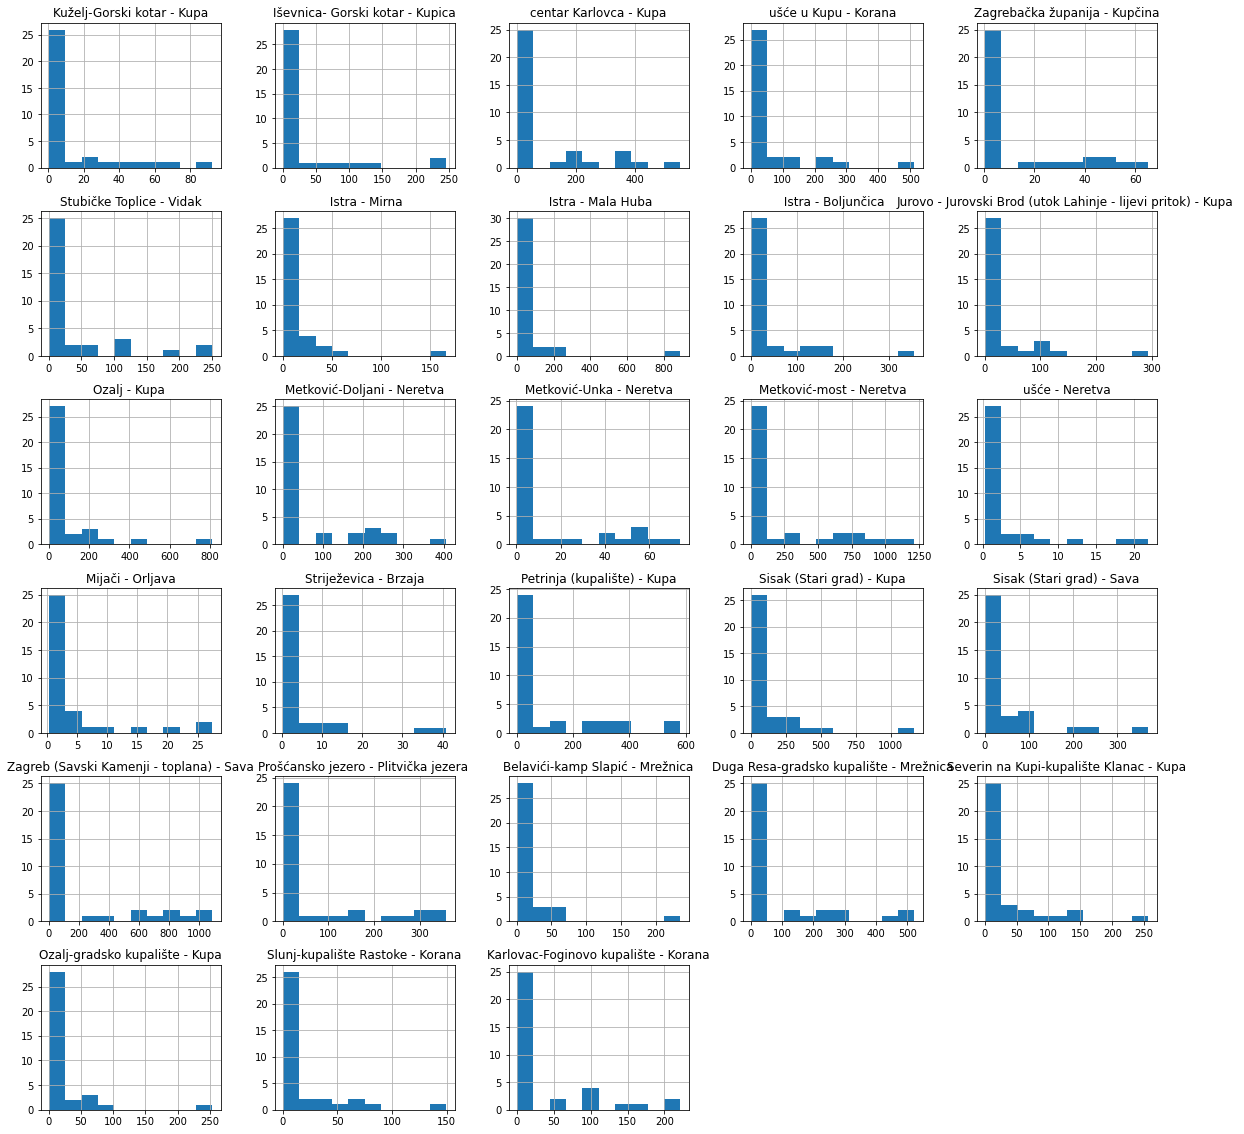

In [30]:
PBT_rel.hist(figsize=(20, 20))

In [31]:
log_relpbt=np.log10(PBT_rel)

/home/ivana/repozitorij/diplomski/ivana_dip/dipenv/lib/python3.10/site-packages/pandas/core/internals/blocks.py:366: RuntimeWarning: divide by zero encountered in log10
  result = func(self.values, **kwargs)


# SPEARMAN CORRRELATION

In [32]:
from scipy.stats import spearmanr

# Izračun Spearmanove korelacije
corr_PB, p_value_PB = spearmanr(P, B)
corr_PT, p_value_PT = spearmanr(P, T)
corr_BT, p_value_BT = spearmanr(B, T)
corr_PBT_P, p_value_PBT_P = spearmanr(score_PBT, P)
corr_PBT_B, p_value_PBT_B = spearmanr(score_PBT, B)
corr_PBT_T, p_value_PBT_T = spearmanr(score_PBT, T)

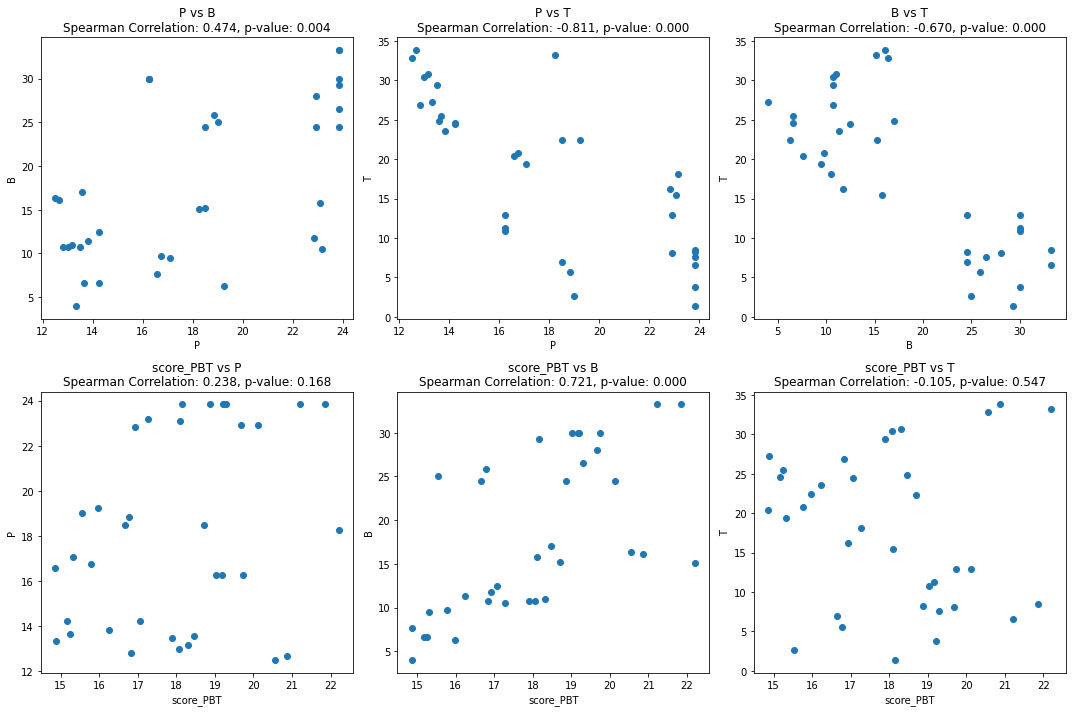

In [33]:
# Parovi za korelaciju
pairs = [('P', 'B', P, B), ('P', 'T', P, T), ('B', 'T', B, T), ('score_PBT', 'P', score_PBT, P), ('score_PBT', 'B', score_PBT, B), ('score_PBT', 'T', score_PBT, T)]

# Postavljanje figure za plotove
plt.figure(figsize=(15, 10))

for i, (var1, var2, data1, data2) in enumerate(pairs, 1):
    plt.subplot(2, 3, i)
    plt.scatter(data1, data2)
    corr, p_value = spearmanr(data1, data2)
    plt.title(f'{var1} vs {var2}\nSpearman Correlation: {corr:.3f}, p-value: {p_value:.3f}')
    plt.xlabel(var1)
    plt.ylabel(var2)

plt.tight_layout()
plt.show()


<Axes: xlabel='B', ylabel='T'>

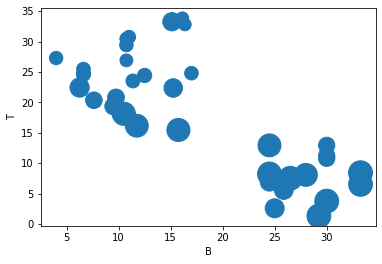

In [34]:
PBT_score.plot.scatter(x='B', y='T', s=np.square(P))

<Axes: xlabel='P', ylabel='T'>

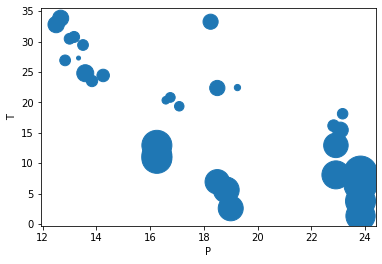

In [35]:
PBT_score.plot.scatter(x='P', y='T', s=np.square(B))

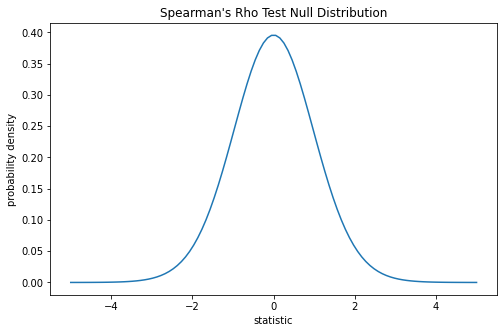

In [36]:
from scipy import stats
x=P
y=B
dof = len(x)-2  # len(x) == len(y)
dist = stats.t(df=dof)
t_vals = np.linspace(-5, 5, 100)
pdf = dist.pdf(t_vals)
fig, ax = plt.subplots(figsize=(8, 5))
def plot(ax):  # we'll re-use this
    ax.plot(t_vals, pdf)
    ax.set_title("Spearman's Rho Test Null Distribution")
    ax.set_xlabel("statistic")
    ax.set_ylabel("probability density")
plot(ax)
plt.show()

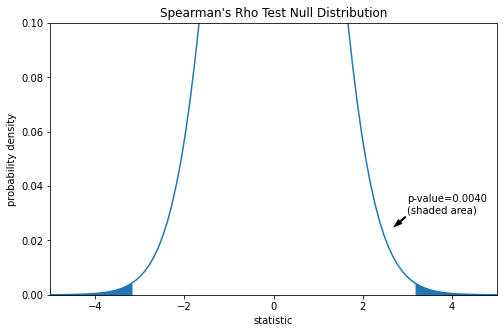

In [37]:
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
res=spearmanr(B, P)
rs = res.statistic  # original statistic
transformed = rs * np.sqrt(dof / ((rs+1.0)*(1.0-rs)))
pvalue = dist.cdf(-transformed) + dist.sf(transformed)
annotation = (f'p-value={pvalue:.4f}\n(shaded area)')
props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
_ = ax.annotate(annotation, (2.7, 0.025), (3, 0.03), arrowprops=props)
i = t_vals >= transformed
ax.fill_between(t_vals[i], y1=0, y2=pdf[i], color='C0')
i = t_vals <= -transformed
ax.fill_between(t_vals[i], y1=0, y2=pdf[i], color='C0')
ax.set_xlim(-5, 5)
ax.set_ylim(0, 0.1)
plt.show()

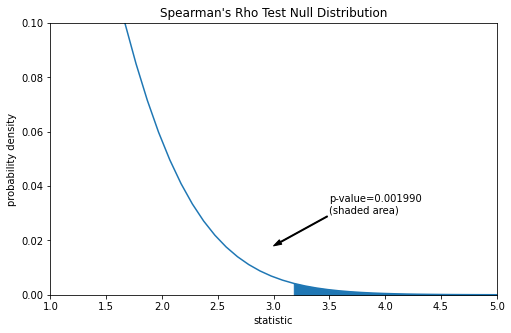

In [38]:
res = stats.spearmanr(x, y, alternative='greater')
res.statistic
0.7000000000000001  # same statistic
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
pvalue = dist.sf(transformed)
annotation = (f'p-value={pvalue:.6f}\n(shaded area)')
props = dict(facecolor='black', width=1, headwidth=5, headlength=8)
_ = ax.annotate(annotation, (3, 0.018), (3.5, 0.03), arrowprops=props)
i = t_vals >= transformed
ax.fill_between(t_vals[i], y1=0, y2=pdf[i], color='C0')
ax.set_xlim(1, 5)
ax.set_ylim(0, 0.1)
plt.show()

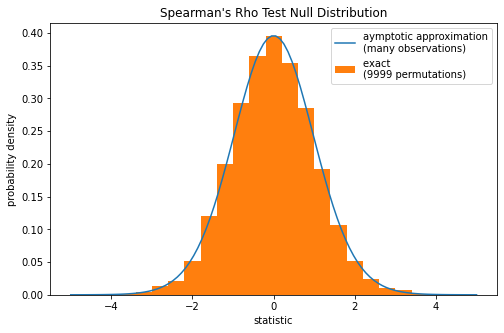

In [39]:
def statistic(x):  # explore all possible pairings by permuting `x`
    rs = stats.spearmanr(x, y).statistic  # ignore pvalue
    transformed = rs * np.sqrt(dof / ((rs+1.0)*(1.0-rs)))
    return transformed
ref = stats.permutation_test((x,), statistic, alternative='greater',
                             permutation_type='pairings')
fig, ax = plt.subplots(figsize=(8, 5))
plot(ax)
ax.hist(ref.null_distribution, np.linspace(-5, 5, 26),
        density=True)
ax.legend(['aymptotic approximation\n(many observations)',
           f'exact \n({len(ref.null_distribution)} permutations)'])
plt.show()